1. Smart Question

¿Cuál es el comportamiento de las varibales morfológicas, además del sexo y la dieta en 3 especies del género Pygoscelis?


2. Obetener los datos

In [79]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Paths
extended_path = 'https://raw.githubusercontent.com/Miguelucho-M/AED_experimentation/main/palmerpenguins_extended.csv'
original_path = 'https://raw.githubusercontent.com/Miguelucho-M/AED_experimentation/main/palmerpenguins_original.csv'

Como la base de datos _extended contiene más variables, será la que usaré de aquí en adelante para el análisis de datos

In [80]:
# Definir las bases de datos
data_extended = pd.read_csv(extended_path)
print(extended_path)


https://raw.githubusercontent.com/Miguelucho-M/AED_experimentation/main/palmerpenguins_extended.csv


3. Analizar la estructura de los datos

In [81]:
data_extended

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


In [93]:
#Imprimir información del conjunto de datos
print("Infomración del conjunto de datos:\n")
print(data_extended.info())

#Mostrar estadísticas descriptivas
print("\nEstadísitcas descriptivas:\n")
print(data_original.describe(include='all'))

Infomración del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB
None

Estadísitcas descriptivas:

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000      

Descripción de los campos

Cada fila contiene la información de datos morfológicos de individuos de 3 especies del género Pygoscelis

- species: especie de pinguino

- island: isla donde se hizo el registro del individuo

- bill_length_mm: largo del pico de pinguino en mm

- bill_depth_mm: ancho del pico del pinguino en mm

- flipper_length_mm: ingresos liquidos disponibles de quién recibió el préstamo

- body_mass_g: masa del pinguino medido en gramos

- sex: sexo del individuo registrado

- diet: dieta del individuo registrado

- life_stage: estadío de vida del individuo registrado

- health_metrics: Estado de salud del individuo registrado









4. Dividir entre categóricas y numéricas

In [109]:
# Obtiene los tipos de datos de las columnas
columnas_categóricas = list(data_extended.select_dtypes(include=['object', 'category']).columns)
columnas_numéricas =   list(data_extended.select_dtypes(include=['number']).columns)

print("Columnas catgóricas:", columnas_categóricas)
print("Columnas numéricas:", columnas_numéricas)

Columnas catgóricas: ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
Columnas numéricas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


Como la variable "year" no es una características de los pingüinos, la voy a quitar

In [84]:
df = data_extended.copy()
df = df.drop(['year'], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight
...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy


Verificación de si hay valores faltantes:

In [85]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
dtype: int64

5. Análisis univariado categórico

C:\Users\migue\AppData\Local\Temp\ipykernel_10172\4273212047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_10172\4273212047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_10172\4273212047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
C:\Users\migue\AppData\Local\Temp\ipykernel_10172\4273212047.py:7: FutureWar

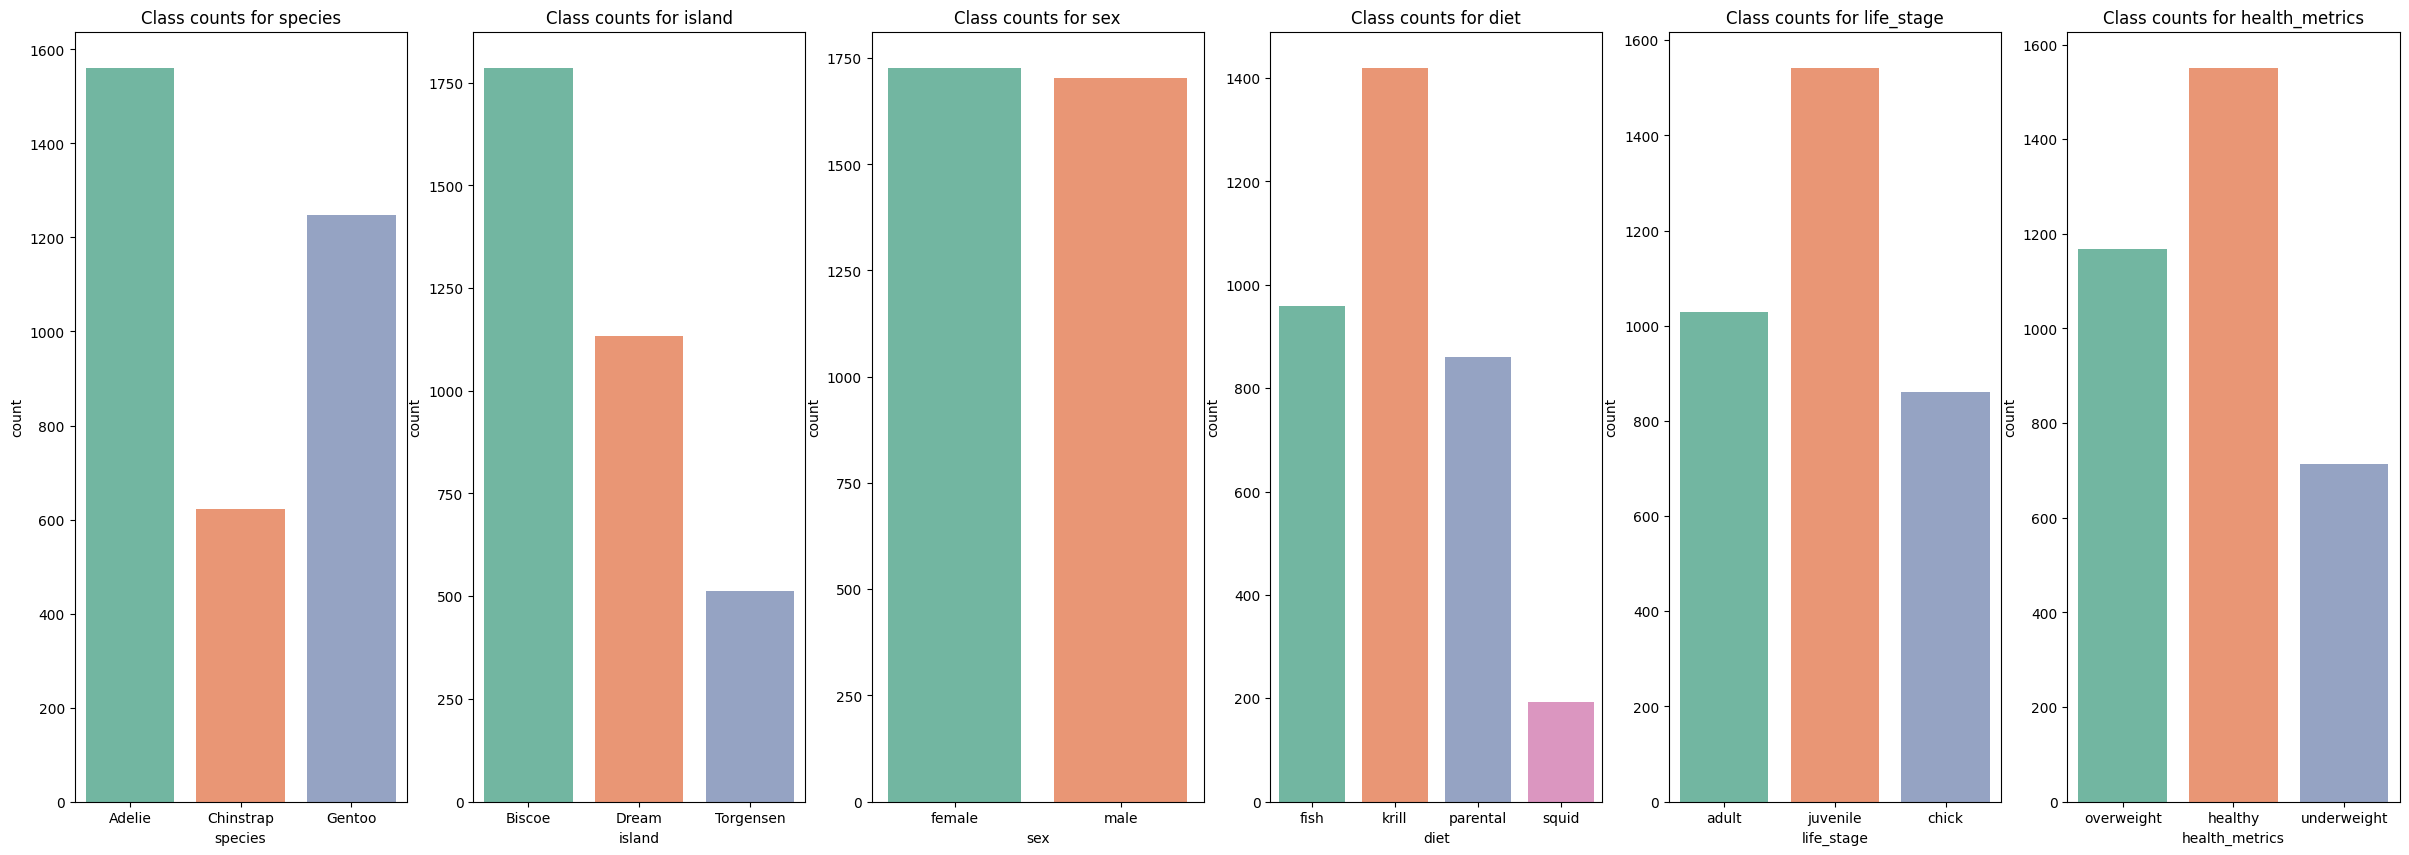

In [86]:
#Histograma

cols = ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
nCols = len(cols)
fig, ax = plt.subplots(1,nCols, figsize=(5*nCols,10))
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=ax[i], palette="Set2")
    ax[i].set_title('Class counts for ' + col)

In [141]:
#revisar los valores únicos
for columna in df.select_dtypes(include='object'):
    print(f"Columna {columna}:")
    print(df[columna].unique())

Columna species:
['Adelie' 'Chinstrap' 'Gentoo']
Columna island:
['Biscoe' 'Dream' 'Torgensen']
Columna sex:
['female' 'male']
Columna diet:
['fish' 'krill' 'parental' 'squid']
Columna life_stage:
['adult' 'juvenile' 'chick']
Columna health_metrics:
['overweight' 'healthy' 'underweight']


6. Análisis univariado numérico

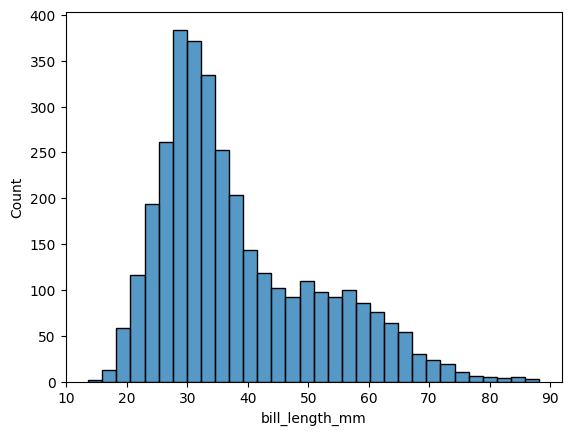

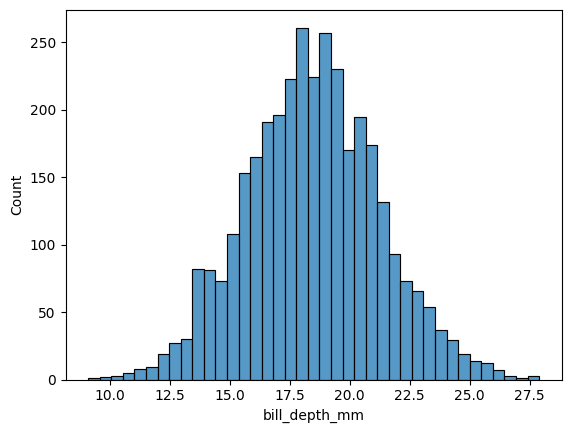

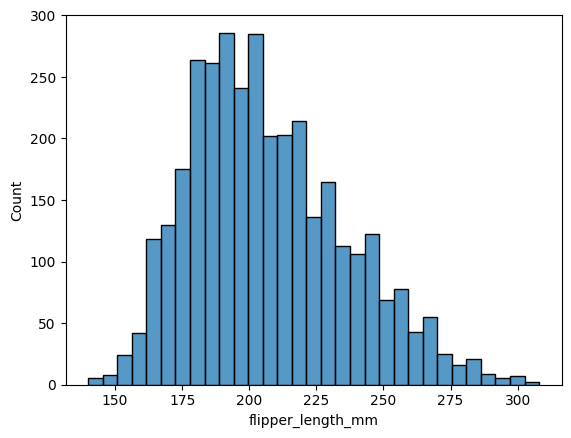

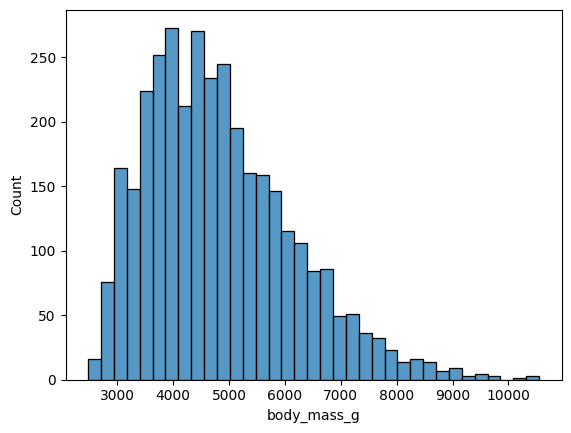

In [174]:
#distribución de las variables numéricas

for columna in df.select_dtypes(include="number"):
  sns.histplot(data=df, x=columna,)
  plt.show()

In [212]:
#Mostrar estadísticos de las varibales numéricas

df.select_dtypes(include='number').describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3430.000000,3430.000000,3430.000000,3430.000000
mean,38.529825,18.447143,207.028863,4834.710496
std,13.175171,2.774428,28.944765,1311.091310
min,13.600000,9.100000,140.000000,2477.000000
25%,28.900000,16.600000,185.000000,3843.500000
50%,34.500000,18.400000,203.000000,4633.500000
75%,46.600000,20.300000,226.000000,5622.000000
max,88.200000,27.900000,308.000000,10549.000000


In [213]:
#Tendencia central de las variables numéricas

# Seleccionar las variables numéricas
variables_numericas = df.select_dtypes(include='number')

# Calcular la media
media = variables_numericas.mean()

# Calcular la mediana
mediana = variables_numericas.median()

# Calcular la moda
moda = variables_numericas.mode()

# Imprimir los resultados
print("Media:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)

Media:
 bill_length_mm         38.529825
bill_depth_mm          18.447143
flipper_length_mm     207.028863
body_mass_g          4834.710496
dtype: float64

Mediana:
 bill_length_mm         34.5
bill_depth_mm          18.4
flipper_length_mm     203.0
body_mass_g          4633.5
dtype: float64

Moda:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            30.9           18.1              195.0       3581.0
1             NaN            NaN                NaN       3986.0
2             NaN            NaN                NaN       3990.0
3             NaN            NaN                NaN       4312.0


7.  Análisis de correlación entre variables

Como la variable "species" podría resultar ser una variable objetivo, marco los resultados de las gráficas de distribución con ella:

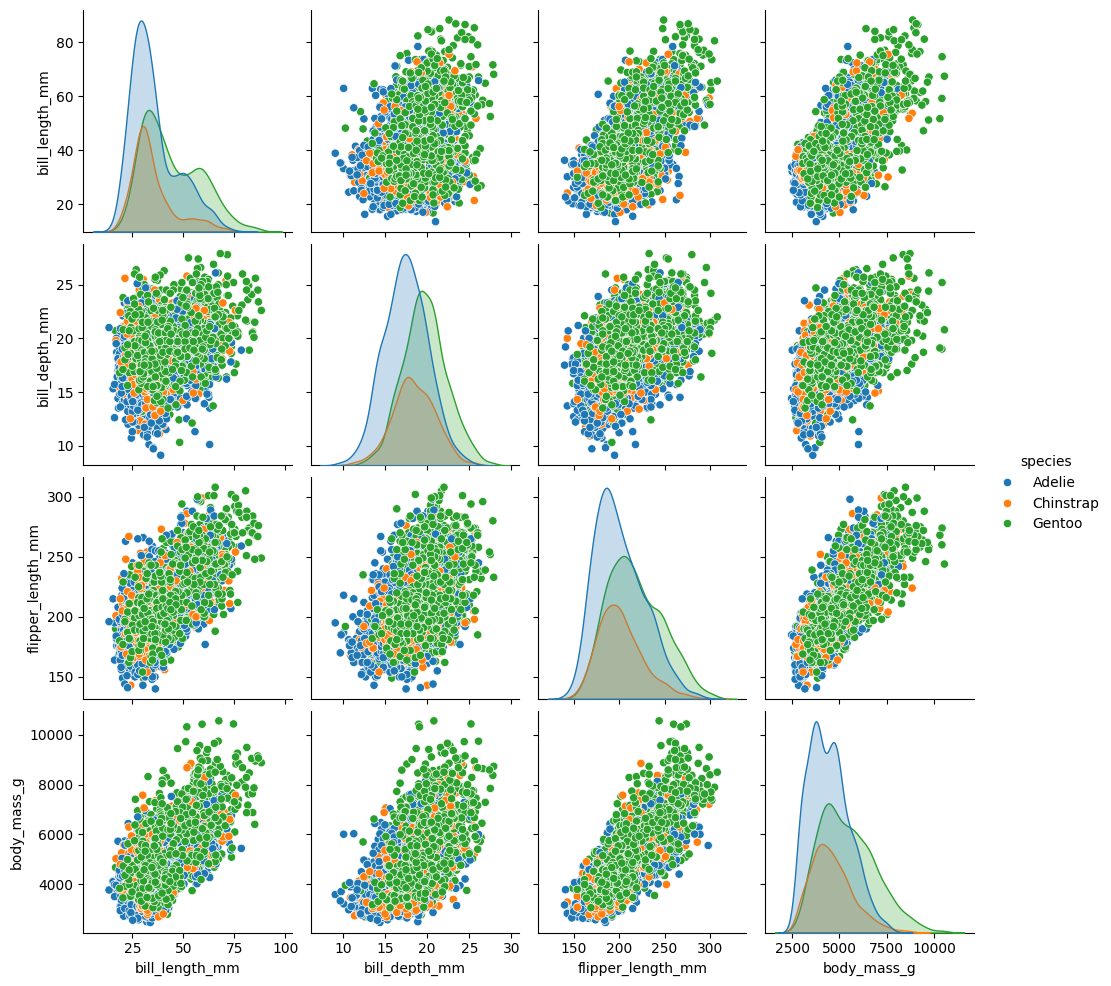

In [170]:
sns.pairplot(data=df, hue='species' )

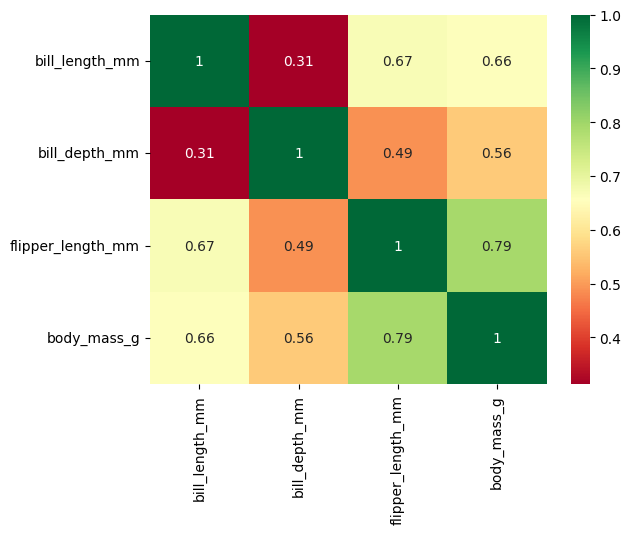

In [180]:
# Calcula la matriz de correlación
correlaciones = df.select_dtypes(include=["number"]).corr()

# Muestra la matriz de correlación
sns.heatmap(correlaciones, annot=True, cmap="RdYlGn")
plt.show()

8. Imputación de datos

En este caso, no es necesario ahcer imputaciones porque no hay datos faltantes